<a href="https://colab.research.google.com/github/Durruuti/Red_neuronal_python-tensorfflow/blob/main/miprimeraredneuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [49]:
celsius = np.array([-40, -30, -20, -10, 0, 10, 20, 30, 40, 50], dtype=float)
fahrenheit = (celsius * 1.8) + 32

In [50]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
train_celsius = celsius[:8]
train_fahrenheit = fahrenheit[:8]
test_celsius = celsius[8:]
test_fahrenheit = fahrenheit[8:]

In [51]:
# Definir el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [52]:
# Compilar el modelo
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_absolute_error'
)

In [81]:
# Entrenar el modelo
print("Comenzando entrenamiento...")
historial = modelo.fit(train_celsius, train_fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


In [82]:
# Evaluar el modelo en el conjunto de prueba
loss = modelo.evaluate(test_celsius, test_fahrenheit)
print("Pérdida en el conjunto de prueba: ", loss)

1/1 [==============================] - 0s 28ms/step - loss: 44.9787
Pérdida en el conjunto de prueba:  44.97871398925781


In [83]:
# Hacer una predicción
resultado = modelo.predict([100.0])
print("El resultado es:", resultado[0][0], "fahrenheit")

1/1 [==============================] - 0s 65ms/step
El resultado es: 68.021286 fahrenheit


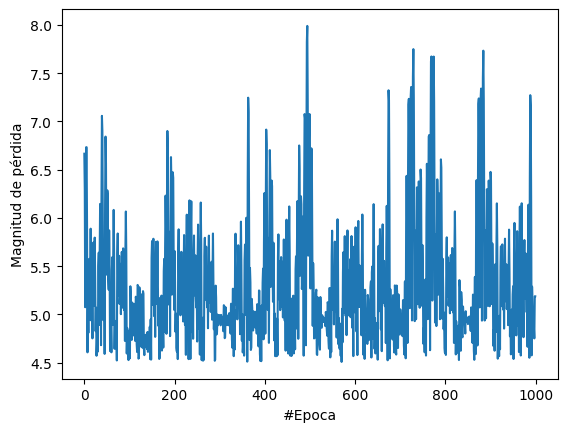

In [77]:
# Graficar la evolución de la pérdida durante el entrenamiento
plt.xlabel("#Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [73]:
# Imprimir las variables internas del modelo
for capa in modelo.layers:
    pesos, sesgos = capa.get_weights()
    print("Pesos:", pesos)
    print("Sesgos:", sesgos)


Pesos: [[ 0.23982917 -0.07894944 -0.84451324  1.4452318 ]]
Sesgos: [-4.2756153e-07 -3.1579776e+00  7.7250929e+00 -1.7089461e+00]
Pesos: [[ 8.0485404e-02 -5.0951493e-01 -5.5491662e-01 -2.1669288e-07]
 [-5.1290661e-01 -4.5421025e-01 -7.2159338e-01  2.6122040e-08]
 [-8.3305168e-01 -1.1091552e+00 -7.8959149e-01  1.2034426e+00]
 [-8.8336229e-02 -6.0538113e-02 -6.9665879e-01 -1.5215040e+00]]
Sesgos: [-0.83892345 -0.9541177  -1.4133364  10.2499895 ]
Pesos: [[-0.34743756]
 [-0.2106207 ]
 [ 0.2035384 ]
 [-1.8915627 ]]
Sesgos: [67.964905]
